In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from kfold import two_fold_split, three_fold_split, four_fold_split, five_fold_split
from normalizers import MinMaxNormalizer, StandardScaler
from metrics import MSE, RMSE
from LR_Model import LinearRegression
from plot_utils import plot_RMSEs

In [3]:
df_data = pd.read_csv('Real estate.csv', index_col=0)

In [4]:
df_data

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6


In [9]:
df_data['Years since'] = df_data['X1 transaction date'].apply(lambda x: 2018 - int(str(x).split('.')[0]))

In [8]:
df_data

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,Years since
No,,,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,7
2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,7
3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,6
4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,6
5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,7
...,...,...,...,...,...,...,...,...
410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4,6
411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0,7
412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6,6


In [10]:
X = df_data.drop(columns=['Y house price of unit area', 'X1 transaction date'])
y = df_data['Y house price of unit area']

In [11]:
two_folds = two_fold_split(X, y)
three_folds = three_fold_split(X, y)
four_folds = four_fold_split(X, y)
five_folds = five_fold_split(X, y)

In [12]:
def add_ones(X):
    return np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)

In [13]:
def solveNormalEquation(X, y):
    """
    Implementation of a function to solve the normal equation

    Args:
        X: Data to solve
        y: Labels to solve

    Returns:
        The solution to the normal equation
    """
    # X = add_ones(X)
    params = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return params

In [14]:
def evaluate_model(X, y, params):
    """
    Implementation of a function to evaluate the model

    Args:
        X: Data to evaluate
        y: Labels to evaluate
        params: Parameters of the model

    Returns:
        The evaluation of the model
    """
    y_pred = X.dot(params)
    return RMSE(y, y_pred), MSE(y, y_pred)

# Gradient Descent

In [15]:
learning_rates = [0.0001, 0.001, 0.01, 0.1]

K = 2

In [16]:
for learning_rate in learning_rates:
    RMSEs = []
    MSEs = []
    print(f'Learning Rate: {learning_rate}')
    for fold in two_folds:
        X_train, y_train, X_test, y_test = fold

        standard_scaler = StandardScaler()
        X_train = standard_scaler.fit_transform(X_train)
        X_test = standard_scaler.transform(X_test) 

        X_train = add_ones(X_train)
        X_test = add_ones(X_test)

        LR = LinearRegression(learning_rate=learning_rate, epochs=1000, early_stopping=False)
        LR.fit(X_train, y_train)
        params = LR.get_params()

        rmse, mse = evaluate_model(X_test, y_test, params)

        RMSEs.append(rmse)
        MSEs.append(mse)
        print('RMSE: {}, MSE: {}'.format(rmse, mse))
    print(f"Average RMSE: {np.mean(RMSEs)}, RMSE Variance: {np.var(RMSEs)}")
    print()

Learning Rate: 0.0001
RMSE: 36.214587773310285, MSE: 1311.496367590795
RMSE: 35.816254490787934, MSE: 1282.804085748887
Average RMSE: 36.01542113204911, RMSE Variance: 0.039667350991257844

Learning Rate: 0.001
RMSE: 16.640112872492434, MSE: 276.89335640928846
RMSE: 16.462243939582923, MSE: 271.0054755263347
Average RMSE: 16.55117840603768, RMSE Variance: 0.007909339323592082

Learning Rate: 0.01
RMSE: 8.165105652285218, MSE: 66.66895031298003
RMSE: 9.629049634769604, MSE: 92.71859686885664
Average RMSE: 8.89707764352741, RMSE Variance: 0.5357829959630609

Learning Rate: 0.1
RMSE: 8.168424487404579, MSE: 66.72315860643076
RMSE: 9.625700471314298, MSE: 92.6541095634603
Average RMSE: 8.897062479359438, RMSE Variance: 0.5309133233200101



## As we can see a LR of 0.1 performs the best so we'll plot that and have a look

In [17]:
all_RMSEs = []
RMSEs = []
MSEs = []
for fold in two_folds:
    X_train, y_train, X_test, y_test = fold
    standard_scaler = StandardScaler()
    X_train = standard_scaler.fit_transform(X_train)
    X_test = standard_scaler.transform(X_test) 
    X_train = add_ones(X_train)
    X_test = add_ones(X_test)
    LR = LinearRegression(learning_rate=0.1, epochs=1000, early_stopping=False)
    LR.fit(X_train, y_train)
    params = LR.get_params()
    all_RMSEs.append(LR.get_RMSEs())
print()

<module 'matplotlib.pyplot' from 'C:\\Users\\ASUS\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python39\\site-packages\\matplotlib\\pyplot.py'>

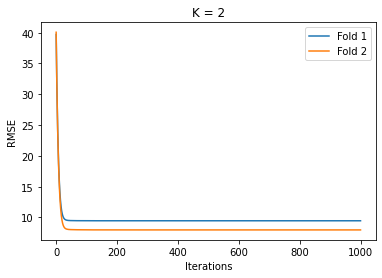

In [18]:
plot_RMSEs(all_RMSEs, "K = 2", "Iterations", "RMSE")

K = 3

In [19]:
for learning_rate in learning_rates:
    RMSEs = []
    MSEs = []
    print(f'Learning Rate: {learning_rate}')
    for fold in three_folds:
        X_train, y_train, X_test, y_test = fold

        standard_scaler = StandardScaler()
        X_train = standard_scaler.fit_transform(X_train)
        X_test = standard_scaler.transform(X_test) 

        X_train = add_ones(X_train)
        X_test = add_ones(X_test)

        LR = LinearRegression(learning_rate=learning_rate, epochs=1000, early_stopping=True)
        LR.fit(X_train, y_train)
        params = LR.get_params()

        rmse, mse = evaluate_model(X_test, y_test, params)

        RMSEs.append(rmse)
        MSEs.append(mse)

        print('RMSE: {}, MSE: {}'.format(rmse, mse))
    print(f"Average RMSE: {np.mean(RMSEs)}, RMSE Variance: {np.var(RMSEs)}")
    print()

Learning Rate: 0.0001
RMSE: 36.73947356534616, MSE: 1349.7889178587693
RMSE: 36.01914827001337, MSE: 1297.379042097207
RMSE: 35.2821101665008, MSE: 1244.8272978010991
Average RMSE: 36.01357733395344, RMSE Variance: 0.35400019704664154

Learning Rate: 0.001
RMSE: 16.860427062435036, MSE: 284.27400072769177
RMSE: 17.319894362286966, MSE: 299.9787407207798
RMSE: 15.41354709832028, MSE: 237.57743415213753
Average RMSE: 16.53128950768076, RMSE Variance: 0.6598590801136908

Learning Rate: 0.01
RMSE: 8.242068626301526, MSE: 67.93169524066393
RMSE: 10.204615502512498, MSE: 104.13417755411841
RMSE: 8.161705523576071, MSE: 66.61343705357214
Average RMSE: 8.869463217463364, RMSE Variance: 0.8923921835159042

Learning Rate: 0.1
RMSE: 8.271321570215122, MSE: 68.41476051790593
RMSE: 10.183123066303592, MSE: 103.69599538348426
RMSE: 8.141517410338379, MSE: 66.28430574284293
Average RMSE: 8.865320682285699, RMSE Variance: 0.8711097483151744



## As we can see a LR of 0.1 performs the best so we'll plot that and have a look

In [20]:
all_RMSEs = []
RMSEs = []
MSEs = []
for fold in three_folds:
    X_train, y_train, X_test, y_test = fold
    standard_scaler = StandardScaler()
    X_train = standard_scaler.fit_transform(X_train)
    X_test = standard_scaler.transform(X_test) 
    X_train = add_ones(X_train)
    X_test = add_ones(X_test)
    LR = LinearRegression(learning_rate=0.1, epochs=1000, early_stopping=False)
    LR.fit(X_train, y_train)
    params = LR.get_params()
    all_RMSEs.append(LR.get_RMSEs())
print()

<module 'matplotlib.pyplot' from 'C:\\Users\\ASUS\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python39\\site-packages\\matplotlib\\pyplot.py'>

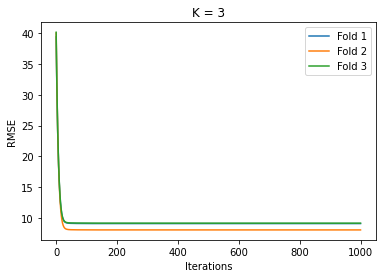

In [21]:
plot_RMSEs(all_RMSEs, "K = 3", "Iterations", "RMSE")

K = 4

In [22]:
for learning_rate in learning_rates:
    RMSEs = []
    MSEs = []
    print(f'Learning Rate: {learning_rate}')
    for fold in four_folds:
        X_train, y_train, X_test, y_test = fold

        standard_scaler = StandardScaler()
        X_train = standard_scaler.fit_transform(X_train)
        X_test = standard_scaler.transform(X_test) 

        X_train = add_ones(X_train)
        X_test = add_ones(X_test)

        LR = LinearRegression(learning_rate=learning_rate, epochs=1000, early_stopping=True)
        LR.fit(X_train, y_train)
        params = LR.get_params()

        rmse, mse = evaluate_model(X_test, y_test, params)

        RMSEs.append(rmse)
        MSEs.append(mse)

        print('RMSE: {}, MSE: {}'.format(rmse, mse))
    print(f"Average RMSE: {np.mean(RMSEs)}, RMSE Variance: {np.var(RMSEs)}")
    print()

Learning Rate: 0.0001
RMSE: 36.247718644869835, MSE: 1313.8971069576442
RMSE: 36.09479003905462, MSE: 1302.8338679634367
RMSE: 36.129290180599426, MSE: 1305.3256089539582
RMSE: 35.57462579986026, MSE: 1265.554000800083
Average RMSE: 36.01160616609603, RMSE Variance: 0.06686750677457182

Learning Rate: 0.001
RMSE: 16.288022785777667, MSE: 265.2996862700125
RMSE: 16.66312980076215, MSE: 277.65989475704765
RMSE: 17.331599052044304, MSE: 300.38432570082296
RMSE: 15.840916748486539, MSE: 250.93464343248132
Average RMSE: 16.530917096767666, RMSE Variance: 0.2984174798856341

Learning Rate: 0.01
RMSE: 7.008145318250513, MSE: 49.11410080171659
RMSE: 9.174003996217724, MSE: 84.16234932261877
RMSE: 10.81667607230247, MSE: 117.00048125312081
RMSE: 8.315327349782656, MSE: 69.14466893404345
Average RMSE: 8.828538184138342, RMSE Variance: 1.9123136090861883

Learning Rate: 0.1
RMSE: 7.0322209679475005, MSE: 49.452131742040486
RMSE: 9.163139481159131, MSE: 83.96312515117724
RMSE: 10.82724997440253, M

## As we can see a LR of 0.1 performs the best so we'll plot that and have a look

In [23]:
all_RMSEs = []
RMSEs = []
MSEs = []
for fold in four_folds:
    X_train, y_train, X_test, y_test = fold
    standard_scaler = StandardScaler()
    X_train = standard_scaler.fit_transform(X_train)
    X_test = standard_scaler.transform(X_test) 
    X_train = add_ones(X_train)
    X_test = add_ones(X_test)
    LR = LinearRegression(learning_rate=0.1, epochs=1000, early_stopping=False)
    LR.fit(X_train, y_train)
    params = LR.get_params()
    all_RMSEs.append(LR.get_RMSEs())

<module 'matplotlib.pyplot' from 'C:\\Users\\ASUS\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python39\\site-packages\\matplotlib\\pyplot.py'>

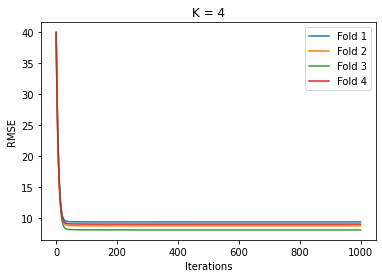

In [24]:
plot_RMSEs(all_RMSEs, "K = 4", "Iterations", "RMSE")

K = 5

In [25]:
for learning_rate in learning_rates:
    RMSEs = []
    MSEs = []
    print(f'Learning Rate: {learning_rate}')
    for fold in five_folds:
        X_train, y_train, X_test, y_test = fold

        standard_scaler = StandardScaler()
        X_train = standard_scaler.fit_transform(X_train)
        X_test = standard_scaler.transform(X_test) 

        X_train = add_ones(X_train)
        X_test = add_ones(X_test)

        LR = LinearRegression(learning_rate=learning_rate, epochs=1000, early_stopping=True)
        LR.fit(X_train, y_train)
        params = LR.get_params()

        rmse, mse = evaluate_model(X_test, y_test, params)

        RMSEs.append(rmse)
        MSEs.append(mse)

        print('RMSE: {}, MSE: {}'.format(rmse, mse))
    print(f"Average RMSE: {np.mean(RMSEs)}, RMSE Variance: {np.var(RMSEs)}")
    print()

Learning Rate: 0.0001
RMSE: 36.002555641050144, MSE: 1296.1840126869115
RMSE: 37.18158163913651, MSE: 1382.4700131877732
RMSE: 35.32325273552617, MSE: 1247.7321838178568
RMSE: 36.32494644686623, MSE: 1319.5017343676993
RMSE: 35.23164782644089, MSE: 1241.2690085663571
Average RMSE: 36.01279685780399, RMSE Variance: 0.5098530038628459

Learning Rate: 0.001
RMSE: 15.950620949442124, MSE: 254.42230867278198
RMSE: 17.688283351885264, MSE: 312.8753679365814
RMSE: 15.439037097855426, MSE: 238.36386650895608
RMSE: 17.745379984223877, MSE: 314.89851078449345
RMSE: 15.659314606027692, MSE: 245.2141339305522
Average RMSE: 16.496527197886877, RMSE Variance: 1.0194279760515688

Learning Rate: 0.01
RMSE: 7.123179491114825, MSE: 50.73968606263885
RMSE: 9.260444732600645, MSE: 85.75583664555103
RMSE: 7.6541923493368405, MSE: 58.586660520646625
RMSE: 11.779289135520894, MSE: 138.75165253820057
RMSE: 7.709911545610658, MSE: 59.44273604114053
Average RMSE: 8.705403450836773, RMSE Variance: 2.871265119794

## As we can see a LR of 0.1 performs the best so we'll plot that and have a look

In [26]:
all_RMSEs = []
RMSEs = []
MSEs = []
for fold in five_folds:
    X_train, y_train, X_test, y_test = fold
    standard_scaler = StandardScaler()
    X_train = standard_scaler.fit_transform(X_train)
    X_test = standard_scaler.transform(X_test) 
    X_train = add_ones(X_train)
    X_test = add_ones(X_test)
    LR = LinearRegression(learning_rate=0.1, epochs=1000, early_stopping=False)
    LR.fit(X_train, y_train)
    params = LR.get_params()
    all_RMSEs.append(LR.get_RMSEs())

<module 'matplotlib.pyplot' from 'C:\\Users\\ASUS\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python39\\site-packages\\matplotlib\\pyplot.py'>

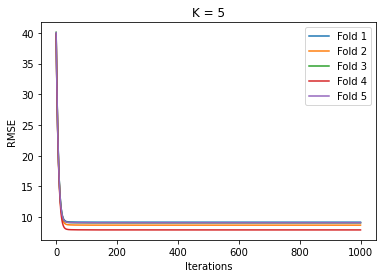

In [27]:
plot_RMSEs(all_RMSEs, "K = 5", "Iterations", "RMSE")

# Regularization

In [28]:
reg_lambdas = [0.001, 0.01, 0.1, 1, 10, 100]

## Ridge

In [29]:
for reg_lambda in reg_lambdas:
    RMSEs = []
    MSEs = []
    print(f'reg_lambda: {reg_lambda}')
    for fold in five_folds:
        X_train, y_train, X_test, y_test = fold

        standard_scaler = StandardScaler()
        X_train = standard_scaler.fit_transform(X_train)
        X_test = standard_scaler.transform(X_test) 

        X_train = add_ones(X_train)
        X_test = add_ones(X_test)

        LR = LinearRegression(learning_rate=0.1, epochs=1000, early_stopping=True, regularization='Ridge', reg_lambda=reg_lambda)
        LR.fit(X_train, y_train)
        params = LR.get_params()

        rmse, mse = evaluate_model(X_test, y_test, params)

        RMSEs.append(rmse)
        MSEs.append(mse)

        print('RMSE: {}, MSE: {}'.format(rmse, mse))
    print(f"Average RMSE: {np.mean(RMSEs)}, RMSE Variance: {np.var(RMSEs)}")
    print()

reg_lambda: 0.001
RMSE: 7.145128642003718, MSE: 51.052863310781895
RMSE: 9.271127327483907, MSE: 85.95380192241888
RMSE: 7.674398197353708, MSE: 58.89638769154583
RMSE: 11.744928304511292, MSE: 137.9433408781105
RMSE: 7.683865891036609, MSE: 59.04179503143582
Average RMSE: 8.703889672477846, RMSE Variance: 2.81994233619207

reg_lambda: 0.01
RMSE: 7.24005336228657, MSE: 52.41837268875707
RMSE: 9.381230653460175, MSE: 88.00748857342083
RMSE: 7.651046859199967, MSE: 58.53851804167368
RMSE: 11.72634293460031, MSE: 137.50711861985062
RMSE: 7.685752320421812, MSE: 59.07078873086927
Average RMSE: 8.736885225993767, RMSE Variance: 2.7752938787261368

reg_lambda: 0.1
RMSE: 9.928747212221872, MSE: 98.58002120420358
RMSE: 11.930464919959357, MSE: 142.33599320638083
RMSE: 9.591955637962092, MSE: 92.00561296063276
RMSE: 13.047843387285372, MSE: 170.24621705912662
RMSE: 9.797809881331977, MSE: 95.99707847072655
Average RMSE: 10.859364207752135, RMSE Variance: 1.9071935836059317

reg_lambda: 1
RMSE: 

## Lasso

In [30]:
for reg_lambda in reg_lambdas:
    RMSEs = []
    MSEs = []
    print(f'reg_lambda: {reg_lambda}')
    for fold in five_folds:
        X_train, y_train, X_test, y_test = fold

        standard_scaler = StandardScaler()
        X_train = standard_scaler.fit_transform(X_train)
        X_test = standard_scaler.transform(X_test) 

        X_train = add_ones(X_train)
        X_test = add_ones(X_test)

        LR = LinearRegression(learning_rate=0.1, epochs=1000, early_stopping=True, regularization='Lasso', reg_lambda=reg_lambda)
        LR.fit(X_train, y_train)
        params = LR.get_params()

        rmse, mse = evaluate_model(X_test, y_test, params)

        RMSEs.append(rmse)
        MSEs.append(mse)

        print('RMSE: {}, MSE: {}'.format(rmse, mse))
    print(f"Average RMSE: {np.mean(RMSEs)}, RMSE Variance: {np.var(RMSEs)}")
    print()

reg_lambda: 0.001
RMSE: 7.138458135167153, MSE: 50.957584547534104
RMSE: 9.261886465846922, MSE: 85.78254090623838
RMSE: 7.680602382840842, MSE: 58.991652963300425
RMSE: 11.749534935659145, MSE: 138.05157120427475
RMSE: 7.687553348823442, MSE: 59.09847649100653
Average RMSE: 8.7036070536675, RMSE Variance: 2.8235894778201622

reg_lambda: 0.01
RMSE: 7.140616018699864, MSE: 50.98839712651311
RMSE: 9.261311921952696, MSE: 85.77189851570314
RMSE: 7.676440562574069, MSE: 58.92773971073249
RMSE: 11.748515918280695, MSE: 138.02762628209487
RMSE: 7.686836335325262, MSE: 59.08745284607671
Average RMSE: 8.702744151366518, RMSE Variance: 2.822867132079941

reg_lambda: 0.1
RMSE: 7.170115959910152, MSE: 51.41056287855828
RMSE: 9.260417970213503, MSE: 85.75534098305316
RMSE: 7.650324893571293, MSE: 58.527470977196614
RMSE: 11.739875387397467, MSE: 137.82467411162082
RMSE: 7.686377357335927, MSE: 59.08039687936644
Average RMSE: 8.701422313685669, RMSE Variance: 2.8049388848522137

reg_lambda: 1
RMSE:

# Normal Form

K = 2

In [31]:
RMSEs = []
MSEs = []
for fold in two_folds:
    X_train, y_train, X_test, y_test = fold
    params = solveNormalEquation(X_train, y_train)
    rmse, mse = evaluate_model(X_test, y_test, params)
    RMSEs.append(rmse)
    MSEs.append(mse)
    print('RMSE: {}, MSE: {}'.format(rmse, mse))
print(f"Average RMSE: {np.mean(RMSEs)}, Average MSE: {np.mean(MSEs)}")

RMSE: 8.175738783272324, MSE: 66.84270465230323
RMSE: 9.633509564838526, MSE: 92.80450653583539
Average RMSE: 8.904624174055424, Average MSE: 79.8236055940693


K = 3

In [32]:
RMSEs = []
MSEs = []
for fold in three_folds:
    X_train, y_train, X_test, y_test = fold
    params = solveNormalEquation(X_train, y_train)
    rmse, mse = evaluate_model(X_test, y_test, params)
    RMSEs.append(rmse)
    MSEs.append(mse)
    print('RMSE: {}, MSE: {}'.format(rmse, mse))
print(f"Average RMSE: {np.mean(RMSEs)}, Average MSE: {np.mean(MSEs)}")

RMSE: 8.272138626719427, MSE: 68.42827745966356
RMSE: 10.147518357987865, MSE: 102.97212882570075
RMSE: 8.150592907894223, MSE: 66.43216475021562
Average RMSE: 8.856749964200505, Average MSE: 79.27752367852663


K = 4

In [33]:
RMSEs = []
MSEs = []
for fold in four_folds:
    X_train, y_train, X_test, y_test = fold
    params = solveNormalEquation(X_train, y_train)
    rmse, mse = evaluate_model(X_test, y_test, params)
    RMSEs.append(rmse)
    MSEs.append(mse)
    print('RMSE: {}, MSE: {}'.format(rmse, mse))
print(f"Average RMSE: {np.mean(RMSEs)}, Average MSE: {np.mean(MSEs)}")

RMSE: 7.0478014080862526, MSE: 49.67150468782256
RMSE: 9.159832301542467, MSE: 83.90252779238078
RMSE: 10.835062319531874, MSE: 117.39857546813944
RMSE: 8.291573047758881, MSE: 68.7501836063215
Average RMSE: 8.833567269229869, Average MSE: 79.93069788866607


In [34]:
RMSEs = []
MSEs = []
for fold in five_folds:
    X_train, y_train, X_test, y_test = fold
    params = solveNormalEquation(X_train, y_train)
    rmse, mse = evaluate_model(X_test, y_test, params)
    RMSEs.append(rmse)
    MSEs.append(mse)
    print('RMSE: {}, MSE: {}'.format(rmse, mse))
print(f"Average RMSE: {np.mean(RMSEs)}, Average MSE: {np.mean(MSEs)}")

RMSE: 7.15465365030286, MSE: 51.18906885579204
RMSE: 9.266839756448137, MSE: 85.87431907168776
RMSE: 7.695705437572973, MSE: 59.22388218189022
RMSE: 11.724728270732339, MSE: 137.46925302251015
RMSE: 7.693396778376939, MSE: 59.18835398954066
Average RMSE: 8.707064778686648, Average MSE: 78.58897542428416
